# Boosting Techniques

##
### Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

**Boosting** is an **ensemble learning technique** that combines multiple **weak learners** (typically shallow decision trees) sequentially to form a **strong predictive model**.

Each new learner focuses on the **errors (misclassified samples)** made by previous ones, assigning **higher weights** to those difficult cases. Over iterations, the model reduces both **bias and variance**, improving overall accuracy and robustness.

✅ **In essence:** Boosting converts weak models into a strong one by **iteratively learning from mistakes** and refining predictions.


##
### Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?


| **Aspect**                  | **AdaBoost (Adaptive Boosting)**                                                             | **Gradient Boosting**                                                                     |
| --------------------------- | -------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **Training Approach**       | Adjusts **sample weights** — misclassified samples get higher weights in the next iteration. | Fits new models to **residual errors** (differences between actual and predicted values). |
| **Error Handling**          | Focuses on **misclassified points** by reweighting.                                          | Minimizes a **loss function** (e.g., MSE, log loss) using **gradient descent**.           |
| **Combination of Learners** | Weighted majority vote (classification) or weighted sum (regression).                        | Additive model where each learner **corrects previous residuals**.                        |
| **Sensitivity to Outliers** | More sensitive due to weight amplification.                                                  | Less sensitive, as gradient updates are smoother.                                         |


##
### Question 3: How does regularization help in XGBoost?

In **XGBoost**, **regularization** helps prevent **overfitting** by controlling model complexity through penalties on large coefficients or overly complex trees.

* **L1 regularization (α):** Adds a penalty proportional to the absolute value of leaf weights, promoting **sparsity** (fewer active features).
* **L2 regularization (λ):** Adds a penalty proportional to the square of leaf weights, preventing **large weight values** and improving **stability**.
* Together, they ensure the model remains **simpler, more generalizable, and less prone to noise** in the training data.


##
### Question 4: Why is CatBoost considered efficient for handling categorical data?


**CatBoost** is efficient for handling categorical data because it uses **ordered encoding** and **target-based statistics** instead of traditional one-hot encoding.

* It automatically converts categorical features into numerical values using **target statistics** while avoiding **data leakage**.
* Handles **high-cardinality features** effectively without exploding feature space.
* Reduces preprocessing effort and improves **training speed and accuracy** on datasets with many categorical variables.

✅ **In short:** CatBoost natively manages categorical data, eliminating manual encoding and maintaining model efficiency.


##
### Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?


Boosting techniques are preferred over bagging in scenarios requiring **high accuracy** and **complex pattern detection**, especially when reducing **bias** is critical.

**Common real-world applications include:**

* 🏦 **Credit scoring & loan default prediction** — capturing subtle risk patterns in financial data.
* 🏥 **Medical diagnosis** — improving precision in disease prediction.
* 🛒 **Customer churn & fraud detection** — identifying rare or complex behavioral patterns.
* 📈 **Click-through rate (CTR) prediction** — used in ad targeting and recommendation systems.

✅ **Reason:** Boosting models like **XGBoost, LightGBM, and CatBoost** iteratively learn from mistakes, yielding superior performance on **imbalanced or noisy datasets**.


##
### Datasets:
* Use sklearn.datasets.load_breast_cancer() for classification tasks.
* Use sklearn.datasets.fetch_california_housing() for regression
tasks.

##
### Question 6: Write a Python program to:
* Train an AdaBoost Classifier on the Breast Cancer dataset
* Print the model accuracy


In [1]:
# --- Import Libraries ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# --- Load Dataset ---
data = load_breast_cancer()
X, y = data.data, data.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train AdaBoost Classifier ---
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ada_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


AdaBoost Classifier Accuracy: 0.9649


##
### Question 7: Write a Python program to:
* Train a Gradient Boosting Regressor on the California Housing dataset
* Evaluate performance using R-squared score


In [2]:
# --- Import Libraries ---
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# --- Load Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target

# --- Use a Subset for Faster Computation ---
np.random.seed(42)
subset_idx = np.random.choice(len(X), 2000, replace=False)
X, y = X[subset_idx], y[subset_idx]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Gradient Boosting Regressor ---
gbr_model = GradientBoostingRegressor(
    n_estimators=150, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
gbr_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")


Gradient Boosting Regressor R-squared Score: 0.7815


##
### Question 8: Write a Python program to:
* Train an XGBoost Classifier on the Breast Cancer dataset
* Tune the learning rate using GridSearchCV
* Print the best parameters and accuracy


In [5]:
# --- Import Libraries ---
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# --- Load Dataset ---
data = load_breast_cancer()
X, y = data.data, data.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define XGBoost Classifier (updated, no warnings) ---
xgb_model = XGBClassifier(
    n_estimators=100,
    eval_metric='logloss',   # handles classification automatically
    random_state=42,
    verbosity=0              # suppress XGBoost training logs
)

# --- Define Parameter Grid ---
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# --- Apply GridSearchCV ---
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# --- Evaluate Best Model ---
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# --- Print Results ---
print("Best Parameters:", grid_search.best_params_)
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy: 0.9561


##
### Question 9: Write a Python program to:
* Train a CatBoost Classifier
* Plot the confusion matrix using seaborn


CatBoost Classifier Accuracy: 0.9649


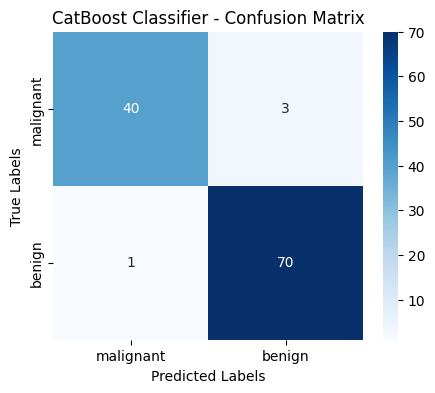

In [4]:
# --- Import Libraries ---
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load Dataset ---
data = load_breast_cancer()
X, y = data.data, data.target

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train CatBoost Classifier ---
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    verbose=0,           # Suppress training output
    random_seed=42
)
cat_model.fit(X_train, y_train)

# --- Predict and Evaluate ---
y_pred = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("CatBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


##
### Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
* Data preprocessing & handling missing/categorical values
* Choice between AdaBoost, XGBoost, or CatBoost
* Hyperparameter tuning strategy
* Evaluation metrics you'd choose and why
* How the business would benefit from your model

### **Step-by-Step Data Science Pipeline for Loan Default Prediction (Boosting Approach)**

#### **1. Data Preprocessing**

* **Handle Missing Values:**

  * For numeric features → use **median imputation** or **KNN imputer**.
  * For categorical features → replace with **“Unknown”** or **most frequent category**.
* **Handle Outliers:**

  * Apply **winsorization** or **log transformation** to smooth extreme values.
* **Encode Categorical Features:**

  * Use **One-Hot Encoding** for AdaBoost/XGBoost.
  * Use **CatBoost’s native handling** for categorical data (no manual encoding required).
* **Scale Numeric Features:**

  * Apply **StandardScaler** or **MinMaxScaler** (especially useful for AdaBoost).

---

#### **2. Model Choice**

| Model        | When to Use                | Key Advantage                                   |
| ------------ | -------------------------- | ----------------------------------------------- |
| **AdaBoost** | Small datasets, low noise  | Simple, interpretable, fast                     |
| **XGBoost**  | Large, complex, mixed data | Handles missing values, highly optimized        |
| **CatBoost** | Many categorical features  | Native categorical handling, less preprocessing |

👉 **Best choice:** **CatBoost** — because it efficiently handles **imbalanced, mixed-type, and missing data** with minimal preprocessing.

---

#### **3. Hyperparameter Tuning Strategy**

Use **GridSearchCV** or **Optuna/Bayesian optimization** to tune parameters like:

* `learning_rate` → controls step size (0.05–0.1 optimal).
* `n_estimators` → number of boosting rounds (100–500).
* `max_depth` → controls tree complexity.
* `scale_pos_weight` (XGBoost/CatBoost) → handles class imbalance.
* `subsample`, `colsample_bytree` → add randomness, prevent overfitting.

Use **early stopping** to prevent overtraining on minority class patterns.

---

#### **4. Evaluation Metrics**

Since the dataset is **imbalanced**, accuracy is misleading. Prefer:

* **ROC-AUC** → measures discrimination ability.
* **Precision, Recall, F1-Score** → focus on reducing false negatives (missed defaulters).
* **Confusion Matrix** → for visual performance comparison.
* **PR-AUC (Precision-Recall AUC)** → when positive class is rare.

---

#### **5. Business Impact**

* **Risk Reduction:** Identifies high-risk borrowers early, lowering loan defaults.
* **Profit Maximization:** Enables smarter credit approvals and dynamic interest rates.
* **Operational Efficiency:** Reduces manual underwriting workload.
* **Trustworthy Decisions:** Boosting models (like CatBoost/XGBoost) are explainable via **SHAP values**, ensuring **regulatory compliance** and model transparency.

---

✅ **In Summary:**
Use **CatBoost** for its handling of categorical and missing data, tune it using **cross-validation**, evaluate via **ROC-AUC and F1-score**, and leverage the model to make **data-driven, risk-aware loan decisions** that improve both **profitability** and **customer trust**.
